# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [125]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
print data.describe()

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: In PCA, we reduce the number of dimensions. This is done by finding out PC1, PC2...dimensions. PC1 is the dimension with most variance of data, PC2 the next dimension with second best variance and so on.

Looking at the data....
1) My guess for first PCA dimension can be the features with maximum spread of data with high standard deviation eg.. Fresh, milk and Grocery, seems to have high values and large mean and large std dev which means large spread of data. They will mainly dominate the PC dimensions. 

2) ICA finds out the new features from the set of input features which have no relation whatsover among themselves. My guess for ICA would be to find out hidden items which are independent of each other. For instance Fresh and Frozen. They both can contain for example item butter, or cheese. Now ICA can help us identify new feature which will separate out this and present entirely new feature for Fresh and Frozen which will not have any corelation.

###PCA

Scaled data
[[ 0.11294004  0.13072723  0.08146416  0.0031063   0.0654272   0.02784731]
 [ 0.06289903  0.13282409  0.10309667  0.02854842  0.08058985  0.03698373]
 [ 0.05662161  0.11918086  0.08278992  0.03911643  0.08605232  0.16355861]
 [ 0.11825445  0.01553586  0.04546385  0.10484189  0.01234568  0.03723404]
 [ 0.20162642  0.07291369  0.07755155  0.063934    0.04345483  0.10809345]]
PCA Components
[[-0.018545    0.49047312  0.57644674 -0.01741587  0.647882    0.08213992]
 [-0.86387717 -0.18182434  0.00363933 -0.39690977  0.12652721 -0.21701704]
 [ 0.50178356 -0.33371506  0.08680857 -0.65833746  0.22070584 -0.38365676]
 [-0.02403365 -0.62796031  0.19740892  0.60521878  0.35050483 -0.27744285]
 [-0.00662714 -0.46794556  0.20894177 -0.20580297  0.05718506  0.83168587]
 [-0.03104894 -0.0412685   0.75995608 -0.01031851 -0.6240232  -0.17403508]]
PCA Varianced Ratio
[ 0.51948323  0.26407007  0.106061    0.06258016  0.03497422  0.01283132]
New dataset
(440, 3)
[[ 10698 -12709   3727]
 [ 1244

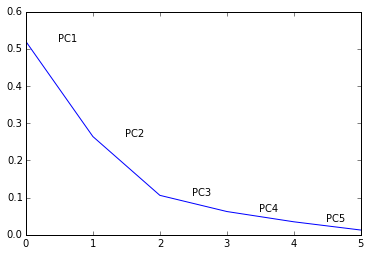

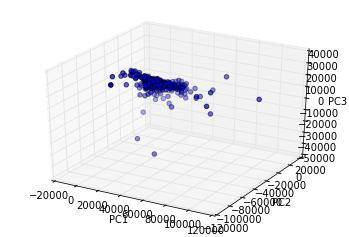

In [126]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#convert to numpy array 
data=np.float64(data)

#scale the data before applying PCA
scaler = MinMaxScaler()
scaledData = scaler.fit_transform(data)

print "Scaled data"
print scaledData[:5]

#Apply PCA

pca = PCA()
pca.fit(scaledData)

# Print the components and the amount of variance in the data contained in each dimension
print "PCA Components"
print pca.components_
print "PCA Varianced Ratio"
print pca.explained_variance_ratio_

for i in range(0,5):
    plt.annotate('PC' + str(i+1),xy=(i+.5,pca.explained_variance_ratio_[i]))
plt.plot(pca.explained_variance_ratio_)

#After analysing taking only 3 components
pca = PCA(n_components = 3)
pca.fit(scaledData)

print "New dataset"
newData = pca.transform(data)
newData = np.int64(newData)
print newData.shape

print newData[:10]

#draw a scatter plot with 3 dimensions
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = newData[:,[0]]
y = newData[:,[1]]
z = newData[:,[2]]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')


ax.scatter(x,y,z)




**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: As shown in the digram for explained variance ratio, there is a huge drop in variance till PC2 and after that it sorts of stabilize. Looking at the graph most of the variance will be covered by PC1, PC2, PC3 (approx 90%) so I will be taking PC1, PC2 and PC3 as my dimensions

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: Lets only concentrate on the first 3 principal components since they provide the maximum variance in data. Taking .5 or above loaders in components.
        Fresh       Milk        Grocery     Frozen       Detergents_Paper  Delicatessen
PC1 : [-0.018545    0.49047312  0.57644674  -0.01741587  0.647882          0.08213992]
PC2 : [-0.86387717 -0.18182434  0.00363933  -0.39690977  0.12652721        -0.21701704]
PC3 : [ 0.50178356 -0.33371506  0.08680857  -0.65833746  0.22070584        -0.38365676]

Above are the coefficients for 3 components.
Principal Component 1
Looking at PC1 coefficients, Milk, Grocery and Detergents_paper dominate the variance of data. Since all are positive therefore the first PC1 score increases with the increase in Milk, Grocery and Detergents_paper. If one increases the other 2 also increases. So in this dimension the annual spending for clients is highly affected by Detergents_Paper, Grocery and Milk.  

Principal Component 2
Here Fresh dominates the component and seems like clients have a lot of buying for Fresh items.

Principal Component 3
Here we can see that Fresh and Frozen are invesely related so higher annual spending on Fresh seems to reduce the spending on Frozen by clients and vice-versa.


###ICA

In [127]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA()

#data is already adjusted above using MinMaxScaler
ica.fit(scaledData)

# Print the independent components
print ica.components_

[[ 0.03386722 -0.16937762 -1.1217232   0.08890071  1.15161872  0.27525383]
 [-0.02367476  0.13992048 -0.59027762 -0.02554335  0.02657332  0.06784611]
 [-0.0172947  -0.72282195  0.53965059  0.02204121 -0.13638361  0.290215  ]
 [ 0.09705072  0.01030154 -0.07189997 -0.67816885  0.02274836  0.28529236]
 [-0.44586446  0.06300603  0.05681917  0.04126572 -0.08315417  0.05029826]
 [-0.04331105 -0.01610754 -0.05595267 -0.03182209  0.02096438  0.8674119 ]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: ICA transforms each vector or feature into independent vectors with no corelation whatsoever with the other ICA vector. 

        Fresh         Milk       Grocery     Frozen     Detergents_Paper  Delicatessen
ICA1 : [ 0.04333912  0.01612432  0.05572712  0.03176696 -0.02081737      -0.86735708]
ICA2 : [ 0.01721693  0.72311694 -0.53889526 -0.02215674  0.13515269      -0.2904316 ]
ICA3 : [ 0.4458909  -0.06308901 -0.05796242 -0.04121706  0.0841773       -0.0500125 ]
ICA4 : [ 0.0970305   0.01031359 -0.07181442 -0.67817688  0.02266067       0.28534983]
ICA5 : [-0.02362195  0.1385175  -0.59548473 -0.02507836  0.03224109       0.06957115]
ICA6 : [-0.03361661  0.16923838  1.11928971 -0.08898534 -1.15154917      -0.27475955]

ICA1
In the first vector Delicatessen has a lot of weight and is influenced by it. It can refer to stores or restuarents who serve ready made cooked food.

ICA2
This is mainly influenced by Milk and negative influenced by Grocery. So probably corresponds to Milk or dairy industries who are more interested in Milk therefore lesser impact on Grocery or by general stores who keep grocery products and do not provide milk products.

ICA3
This is influenced by Fresh and can symbolize shops providing fresh products, like bakery or cake shops

ICA4
Mainly influenced by Frozen item and can be used by industries like ice creams, vegetable sellers, even dairy

ICA5
influenced by Grocery, so can deduce for industries or shops like general stores.

ICA6
Grocery and Detergent paper. Grocery invesely proportionate with Detergents_Paper. Washing machine or toilet product industries, laundary  or general stores 

These components can be used to identify or guess which industry is asking for which products. 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: Here are some of the advantages of using K Means clustering or Gaussian Mixture Models
1) They are very simple algorithm with low computation cost, fast and effective. FOr large number of data points it uses less iterations to find out the cluster. It has hard assignements, points either belong to one or other
2) Gaussian Mixtures are good for density measurements. This one is the fastest to find cluster. It finds cluters having normal distribution. It has soft assignments, points belonging to a cluster is a probability


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [128]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [129]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
pca.fit(scaledData)
reduced_data = pca.transform(data)
reduced_data = np.float64(reduced_data)
print reduced_data[:10]  # print upto 10 elements

[[ 10698.05509204 -12709.48833465]
 [ 12444.64759285  -8513.25591167]
 [ 11511.92784551  -9273.61172404]
 [  3137.46598834 -14526.99418283]
 [  7892.19339745 -22948.22815388]
 [  8101.52043467  -9966.70097994]
 [  7435.48572054 -10943.01772832]
 [ 10057.0060292   -8213.12933584]
 [  6413.8558184   -5906.26463656]
 [ 21175.8630962   -7112.44105503]]


[25.271332088379101, 17.050081108774396, 11.114631549540915, 8.1856161625676407, 5.8862425041522748, 4.8755073310590396, 3.9325109248521928, 3.3556405900216615, 2.9310826608971627, 2.6308232028006744, 2.3235121617368728, 2.102754270051916, 1.8911746716808755, 1.7404364478212475, 1.5932606502940412, 1.4272825854139397, 1.331847843172244, 1.2388505084434758, 1.1174127383403025]


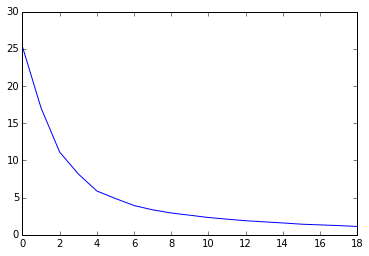

In [130]:
#using elbow to find out how many clusters are required

clusterRange = range(1,20)
sum = 0
var = []

for i in clusterRange:
    clusters = KMeans(n_clusters=i)
    clusters.fit(reduced_data)
    sum = sum + clusters.inertia_
    var.append(clusters.inertia_)

varpercent = []
for x in var:
    varpercent.append(x*100/sum)

print varpercent


plt.plot(varpercent)


#looking at the plot I am planning to take 7 clusters(elbow method)



In [131]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'



clusters = KMeans(n_clusters=7)
#clusters = GMM(n_components=4)
clusters.fit(reduced_data)

print "cluster centre"
print clusters.cluster_centers_ 
print clusters
classlabel = clusters.labels_

cluster centre
[[  5344.68244629 -35241.00015585]
 [ 14436.49099319  -5436.08962507]
 [  5022.06279521 -18250.37704994]
 [ 16368.84559775 -70846.19931653]
 [  3224.01313989  -6523.42575473]
 [ 75873.10125432 -27637.75859225]
 [ 30976.42284466  -8185.9764995 ]]
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [132]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [138]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

import collections
centroids = clusters.cluster_centers_ 
print centroids

#count of customers belong to a cluster
print collections.Counter(classlabel)

[[  5344.68244629 -35241.00015585]
 [ 14436.49099319  -5436.08962507]
 [  5022.06279521 -18250.37704994]
 [ 16368.84559775 -70846.19931653]
 [  3224.01313989  -6523.42575473]
 [ 75873.10125432 -27637.75859225]
 [ 30976.42284466  -8185.9764995 ]]
Counter({4: 170, 2: 103, 1: 88, 0: 35, 6: 33, 3: 6, 5: 5})


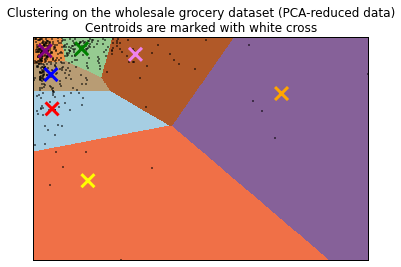

In [135]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

#t = np.arange(7)
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
             color=['red','green', 'blue', 'yellow', 'purple', 'orange', 'violet'], zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: I have identified 7 cluster based on the visualization of data for PCA as above with elbow visualization. Here is the description for each central objects. Also, looking at the cluster there can be 7 different type of customer classes that I have identified. Below are the details of them.

0) [  3224.01313989  -6523.42575473]
Customers segment with low Grocery, milk and detergent_paper and Fresh products. 
Count of these customers : 170

1) [ 14436.49099319  -5436.08962507]
Customers with moderate Grocery, milk and detergent_paper and low FResh products consumption. 
Count : 88

2) [  5022.06279521 -18250.37704994]
Customers with moderate Fresh products and low Grocey, milk and detergent_paper.
Count : 103

3) [  5344.68244629 -35241.00015585]
Customers with large FResh products and low Grocery, milk and detergent_paper.
Count : 35

4) [ 30976.42284466  -8185.9764995 ]
Customers with large Grocery, milk and detergent_paper and low fresh products.
Count : 33

5) [ 16368.84559775 -70846.19931653]
Custoemrs with very large Fresh intake and low Grocery, milk and detergent_paper. They are the outliers, extreme cases
Count : 6

6) [ 75873.10125432 -27637.75859225]
Customers with large Grocery, milk and detergent_paper and low fresh products. They are outliers.
Count : 5


In [141]:
#Let us do some validation and prediction on the cluster that we have drawn
#With the input data, I have 7 cluster, I will have each data to be divided in 7 classes from 0-6
# 'red' : 0,'green' : 1, 'blue': 2, 'yellow' : 3, 'purple' : 4, 'orange' : 5, 'violet' : 6 is the order of the classes from 0-6
print reduced_data[:10]
print classlabel

#lets use test train divide and see whether our classes predicted properly or not
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(reduced_data, classlabel, test_size=0.33)

#lets use a classifier decisionTree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print f1_score(y_test, y_pred)

#f1 score is pretty good, kmeans clustering has done  nice job in clusteting data and segragating classes of customers.






[[ 10698.05509204 -12709.48833465]
 [ 12444.64759285  -8513.25591167]
 [ 11511.92784551  -9273.61172404]
 [  3137.46598834 -14526.99418283]
 [  7892.19339745 -22948.22815388]
 [  8101.52043467  -9966.70097994]
 [  7435.48572054 -10943.01772832]
 [ 10057.0060292   -8213.12933584]
 [  6413.8558184   -5906.26463656]
 [ 21175.8630962   -7112.44105503]]
[2 1 1 2 2 4 4 1 4 1 1 4 0 2 2 4 1 4 2 4 2 4 0 6 2 2 4 2 6 0 2 4 2 0 4 1 0
 1 1 0 2 2 1 6 1 6 6 5 1 6 4 4 0 1 2 4 6 1 4 1 4 5 1 1 4 6 4 2 4 4 2 2 4 2
 1 2 4 6 4 4 4 1 1 2 4 5 5 0 4 2 4 2 6 2 1 4 1 4 4 4 1 1 1 3 2 2 1 1 1 6 4
 1 2 2 2 4 4 4 2 4 2 4 4 1 0 3 2 2 4 0 4 4 2 4 4 4 1 1 2 4 2 0 0 4 2 6 4 4
 4 0 2 4 2 4 4 6 1 2 1 1 1 4 2 6 1 6 1 4 4 4 1 6 4 1 4 1 0 2 4 4 2 3 1 3 4
 4 4 1 1 1 2 4 4 1 4 2 0 1 4 4 6 6 0 4 4 6 4 1 4 6 2 6 4 1 1 1 6 2 1 4 2 1
 4 4 4 4 2 4 4 4 2 4 2 4 2 4 4 2 4 0 2 2 2 4 1 1 4 4 2 4 4 6 4 0 2 0 4 4 0
 0 4 4 2 4 1 1 1 2 1 2 4 4 4 0 4 4 0 2 2 2 4 2 0 0 3 0 4 2 2 0 4 4 4 1 2 4
 2 4 1 4 2 6 1 1 6 1 6 2 4 1 4 0 6 4 4 1 4 4 4 6 

c:\python27\lib\site-packages\sklearn\metrics\classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [157]:
#with my input data I can easily predict the class of the data.
#lets take the first row of the original data and predict its class.

 
#scalling to mean and apply pca1 and pca2 on it 
#Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
print data[0,:]
#test_scalledData =  scaler.fit_transform(data[5:10,:])
transformedData = pca.transform(data[0,:])
print transformedData
print clf.predict(transformedData)

[ 12669.   9656.   7561.    214.   2674.   1338.]
[[ 10698.05509204 -12709.48833465]]
[2]


###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: PC and kmeans gave me most insights into the data. Through PCA I was able to find the correlation and reduce the dimension to properly understand the variuos aspects of data, and then through kmeans I was able to guess which all customers are those to focus on

**9)** How would you use that technique to help the company design new experiments?

Answer: Looking at the outliers( the 2 cluster with less number of points), it seems that there are customers who have huge demand for fresh items and there is another segment of customer who has huge demand for grocery,milk and detergent_paper. But most of the customers are from smaller segment. Looking at this, we should not loose out on the smaller shop vendors as they are the ones who form the bulk. It can be big companies like walmart buying in bulk. 

Designing new Experiments. (A/B testing)
Lets design an A/B test on the current set of clusters. We have 7 clusters. Lets take 50% customers from each cluster and put it one segment and 50% customers in other segment and then implement the morning delivery for one and evening delivery for the other. Once we have the stats with us we can find out who performs better in terms of revenue and customer satisfaction. 
We can also servey on all these customers about what they feel about the delivery. This will provide us better insights what the customer feel about the delivery and heance improve upon customer satisfaction.

**10)** How would you use that data to help you predict future customer needs?


Answer: Grocey, milk, detergent_paper and fresh will be my list of items that will be on my priority. I have also used supervised learning on the initial dataset to predict the class or segment of customer to which the data set belong. The class can be in any class from 0-6 as defined in the cluster.

Using the supervised laerning I have created a descision tree classifier which is trained with the PCA reducded data and cluster classes as response variable. Once my clf is trained I have used the first data set to predict to which class it will belong

[ 12669.   9656.   7561.    214.   2674.   1338.] belongs to a class 2 i.e Customers with moderate Fresh products and low Grocey, milk and detergent_paper. 
